<a href="https://colab.research.google.com/github/Madelinelai/ML/blob/main/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用 Scikit Learn 預測分類問題

1. Logistic regression
1. Overfitting vs underfitting
1. class weight

In [ ]:
# 套件安裝 (避免未來 Colab 預設使用新版本 Python 套件造成程式無法執行)
!pip install scikit-learn==0.22.1
!pip install numpy==1.18.2

In [ ]:
# import 套件
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 固定 random seed，確保每次亂數結果都一樣
np.random.seed(551335114)

In [ ]:
data = load_iris()
print(data.keys())
print('------------------------------------------------------------')
print('filename:', data['filename'])
print("data['feature_names']", data['feature_names'])
print("data['data']: type and shape", type(data['data']), data['data'].shape)
print("data['target_names']", data['target_names'])
print("data['target']: type and shape and unique", type(data['target']), data['target'].shape, np.unique(data['target']))
print('------------------------------------------------------------')
print(data['DESCR'])
# petal: 花瓣
# sepal: 萼片

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
------------------------------------------------------------
filename: /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv
data['feature_names'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data['data']: type and shape <class 'numpy.ndarray'> (150, 4)
data['target_names'] ['setosa' 'versicolor' 'virginica']
data['target']: type and shape and unique <class 'numpy.ndarray'> (150,) [0 1 2]
------------------------------------------------------------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-S

In [ ]:
# 內建資料沒有測試集(test set)，這邊自己做一個
index = np.arange(len(data['target']))
print(index)
np.random.shuffle(index)
print(index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
[ 37  88  82   0   2  16  95 116  31  65 102 147  94  87  22  15  38  85
  59  11  44 142  68 137  66  40  30  57  92 128 126   9  34  10  71   7
  74 144 136  19  46 113  13 100 104 145  12  75  79 120  78 143  23  14
 129  69  80  51 127  24  33  32  91  36  76  56 140  50  89   3 110  27
  63  52 115  53  70 119 101 131   4 111  42 133 105  49   1  45  55 103
 125 146  25 108  41 134 

In [ ]:
# 130 x 4
train_feature = data['data'][index[:130], :]
# 130
train_label = data['target'][index[:130]]

# 20 x 4
test_feature = data['data'][index[130:], :]
# 20
test_label = data['target'][index[130:]]

print('train feature / label shape:', train_feature.shape, train_label.shape)
print('test feature / label shape:', test_feature.shape, test_label.shape)

print('sample train feature:\n', train_feature[0:10])

for i in range(3):
  print('Number of label', i, sum(train_label == i))

train feature / label shape: (130, 4) (130,)
test feature / label shape: (20, 4) (20,)
sample train feature:
 [[4.9 3.6 1.4 0.1]
 [5.6 3.  4.1 1.3]
 [5.8 2.7 3.9 1.2]
 [5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.4 3.9 1.3 0.4]
 [5.7 3.  4.2 1.2]
 [6.5 3.  5.5 1.8]
 [5.4 3.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]]
Number of label 0 45
Number of label 1 44
Number of label 2 41


訓練資料：130筆

測試資料：20筆

優化目標：測試資料的準確度(accuracy)。

Accuracy = 答對的筆數 / 全部的筆數

Logistic regression

公式 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

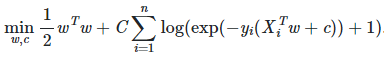

In [ ]:
# training
w = np.array([0.5, 0.3, 0.2, 0.2])
c = 0.1
X = np.array([4.9, 3.6, 1.4, 0.1])
C = 1
y = -1

# 假設資料只有一筆
print(0.5 * np.dot(w, w) + C * np.log(np.exp(-y * (np.dot(X, w) + c)) + 1))

4.159453225628276


In [ ]:
# prediction / inference
np.dot(X, w) + c

3.93

y in {-1, 1}

答對的情況：(y=1 且 xw+c > 0) 或 (y=-1 且 xw+c < 0) 則 exp內 < 0 (有負號)

反之，答錯的情況，exp 內是正數

因為 exp 跟 log (e 為底數)都是遞增函數，所以裡面數字越大，外面的數字就會越大。


In [ ]:
print(np.log(np.exp(-2) + 1))
print(np.log(np.exp(-1) + 1))
print(np.log(np.exp(0) + 1))
print(np.log(np.exp(1) + 1))
print(np.log(np.exp(2) + 1))

0.1269280110429726
0.31326168751822286
0.6931471805599453
1.3132616875182228
2.1269280110429727


**什麼是 overfitting ？**

當 Model 太過複雜的時候...

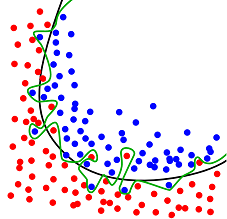

反之，則稱為 underfitting。

image from: 由Chabacano - 自己的作品，CC BY-SA 4.0，https://commons.wikimedia.org/w/index.php?curid=3610704

wTw 為 regularization，避免 overfitting (為什麼？)，靠 C 調整強度。



Multiclass 的解法：

one versus rest (one versus all)：

有 A, B, C 三個類別，訓練三個分類器： A=1, B,C=-1  B=1, A,C=-1  C=1, A,B=-1

預測時三個都做預測，取分數最高的當作答案

multinomial：y 變成向量，w 變成矩陣


# **class_weight='balanced'**

處理 imbalance data 時需要注意 class weight。

假設一組資料有 100 個 1 跟 10000 個 0。

class weight = 100 的話會將 1 的權重 x 100 倍，讓 1 的總權重跟 0 的總權重一樣。

想想看，為什麼要這樣做？

In [ ]:
# 訓練模型 
# 使用方法 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(class_weight='balanced')
model.fit(train_feature, train_label)
train_predict = model.predict(train_feature)
print('Train set accuracy:', accuracy_score(train_label, train_predict))

test_predict = model.predict(test_feature)
print('Test set accuracy:', accuracy_score(test_label, test_predict))

Train set accuracy: 0.9692307692307692
Test set accuracy: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
